# Reducción de la dimensión (lineal)
_Santander Meteorology Group (21-01-2022)_

#### En esta práctica vamos a continuar con la de la Sesión 10, en la que analizábamos la base de datos de cáncer de mama (breastcancer.csv, disponible en Moodle). Contiene características de los núcleos celulares extraídas de imágenes de biopsias. En la sesión 10 ya aplicamos técnicas de selección de valiables y de regularización a este conjunto de datos. En esta práctica se trata de aplicar técnicas proyectivas lineales de reducción de la dimensión: PCA y LDA.

#### **Utiliza el notebook de la sesión 10**, donde ya habíamos cargado los datos y aplicado técnicas de selección de variables y de regularización. Crea secciones al final de ese notebook para realizar las tareas que se solicitan a continuación. 

In [217]:
library(caret)

### 1. Análisis de Componentes Principales
 
  #### 1. Realiza un Análisis de Componentes Principales de las covariables de esta base de datos. Estudia el número óptimo de variables a considerar a la vista de un Scree plot (`? screeplot`). Utiliza un gráfico de varianza explicada acumulada para visualizar la fracción de varianza explicada por estas variables.
 
####  1. Un *biplot* (`? biplot` `?biplot.princomp`) permite visualizar tanto las observaciones como las covariables proyectados sobre las dos primeras PCs. Represéntalo para esta base de datos.
 
####  1. El biplot es útil cuando el número de covariables no es muy elevado. Representa gráficamente las primera EOFs de esta base de datos (p.ej. `? barplot`), para poder interpretar mejor las combinaciones lineales de covariables a las que dan lugar. Comprueba también su ortogonalidad.
 
####  1. Representa una de las muestras, junto con su reconstrucción mediante las r primeras PCs. Comprueba el efecto de aumentar el valor de r.
 
### 2. Análisis Discriminante Lineal
 
####  1. Realiza un Análisis Discriminante Lineal sobre esta base de datos. En este caso, se trata de una técnica de aprendizaje supervisado, en la que involucramos la variable respuesta en la elección de direcciones de proyección de los datos. Representa gráficamente la primera (y única, en este caso) dirección discriminante (p.ej. `? barplot`).
 
####  1. Utiliza LDA para predecir usando el conjunto de datos completo. Examina los valores de la salida de la función (`? predict`, `? predict.lda`) y representa la distribución de los datos a lo largo de la dirección dada por el primer LD (p.ej `? plot` o `? ldahist`).
 
####  1. Obtén una tabla de contingencia para estudiar la pericia de este método lineal de clasificación.
 
####  1. El LDA proporciona una predicción probabilista de las clases, ya que esta técnica implementa un clasificador bayesiano, basado en las probabilidades a posteriori de pertenencia a cada clase, bajo la hipótesis de normalidad. Utilizar una técnica de validación probabilista, como las curva ROC para evaluar la pericia de esta predicción probabilista.
 
####  1. Repetir lo anterior pero mediante una validación cruzada tipo *hold out*, para ver la capacidad de generalización de esta técnica lineal.
 
#### 1. Repetir todos los pasos de esta práctica para otra base de datos de tu elección. Para visualizar mejor los resultados es preferible que no tenga demasiadas covariables, como por ejemplo `ISLR::Hitters` o `USArrests` (consulta la ayuda para ver de qué se trata).

# ANÁLISIS DE COMPONENTES PRINCIPALES

In [12]:
datos <- read.csv("breastcancer.csv")

In [13]:
head(datos)

id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave.points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave.points_worst,symmetry_worst,fractal_dimension_worst,X
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NA
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NA
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NA
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NA
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NA
843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NA


Realiza un Análisis de Componentes Principales de las covariables de esta base de datos. Estudia el número óptimo de variables a considerar a la vista de un Scree plot (? screeplot). Utiliza un gráfico de varianza explicada acumulada para visualizar la fracción de varianza explicada por estas variables.

Preparamos la base de datos:

In [8]:
# Eliminar no predictores (id y última columna vacía)
df <- datos[, -c(1, ncol(datos)-1, ncol(datos))]
# Convertir el factor diagnosis (B y M) a los valores numéricos 0 y 1, respectivamente.
df$diagnosis <- as.numeric(df$diagnosis)-1
# Normalizar los datos (predictores o features) para evitar problemas de diferente variabilidad
df[-1] <- apply(df[-1], MARGIN = 2, scale)
rm(datos)
dim(df)
head(df)

[1] 569  30

diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave.points_mean,symmetry_mean,...,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave.points_worst,symmetry_worst
1,1.0960995,-2.0715123,1.2688173,0.9835095,1.5670875,3.2806281,2.65054179,2.5302489,2.215565542,...,0.90628565,1.8850310,-1.35809849,2.3015755,1.9994782,1.3065367,2.6143647,2.1076718,2.2940576,2.7482041
1,1.8282120,-0.3533215,1.6844726,1.9070303,-0.8262354,-0.4866435,-0.02382489,0.5476623,0.001391139,...,-0.09935632,1.8043398,-0.36887865,1.5337764,1.8888270,-0.3752817,-0.4300658,-0.1466200,1.0861286,-0.2436753
1,1.5784992,0.4557859,1.5651260,1.5575132,0.9413821,1.0519999,1.36227979,2.0354398,0.938858720,...,0.29330133,1.5105411,-0.02395331,1.3462906,1.4550043,0.5269438,1.0819801,0.8542223,1.9532817,1.1512420
1,-0.7682333,0.2535091,-0.5921661,-0.7637917,3.2806668,3.3999174,1.91421287,1.4504311,2.864862154,...,2.04571087,-0.2812170,0.13386631,-0.2497196,-0.5495377,3.3912907,3.8899747,1.9878392,2.1738732,6.0407261
1,1.7487579,-1.1508038,1.7750113,1.8246238,0.2801253,0.5388663,1.36980615,1.4272370,-0.009552062,...,0.49888916,1.2974336,-1.46548091,1.3373627,1.2196511,0.2203623,-0.3131190,0.6126397,0.7286181,-0.8675896
1,-0.4759559,-0.8346009,-0.3868077,-0.5052059,2.2354545,1.2432416,0.86554001,0.8239307,1.004517928,...,0.48641784,-0.1653528,-0.31356043,-0.1149083,-0.2441054,2.0467119,1.7201029,1.2621327,0.9050914,1.7525273


Podemos comprobar la colinealidad:

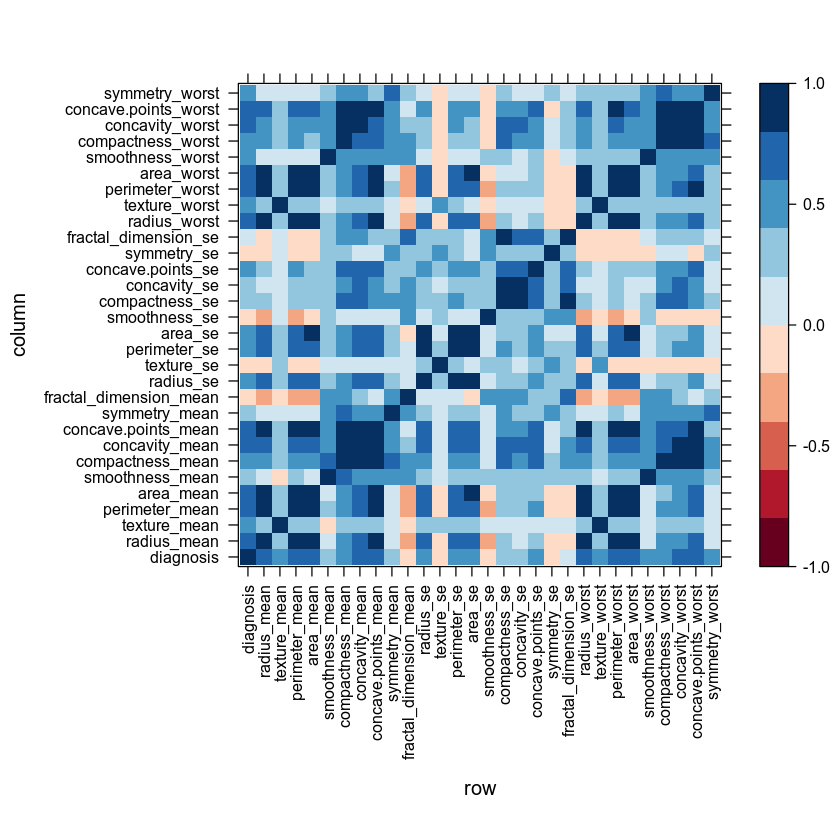

In [9]:
library(RColorBrewer) # brewer.pal
library(lattice) # levelplot
colores <- brewer.pal(10,"RdBu")
levelplot(cor(df), # ó simplemente image(cor(df))
  at = seq(-1, 1, 0.2), col.regions = colores,
  scale = list(x = list(rot = 90)) # gira 90º las etiquetas del eje X
)

In [75]:
pca <- prcomp(df[,(2:ncol(df))])

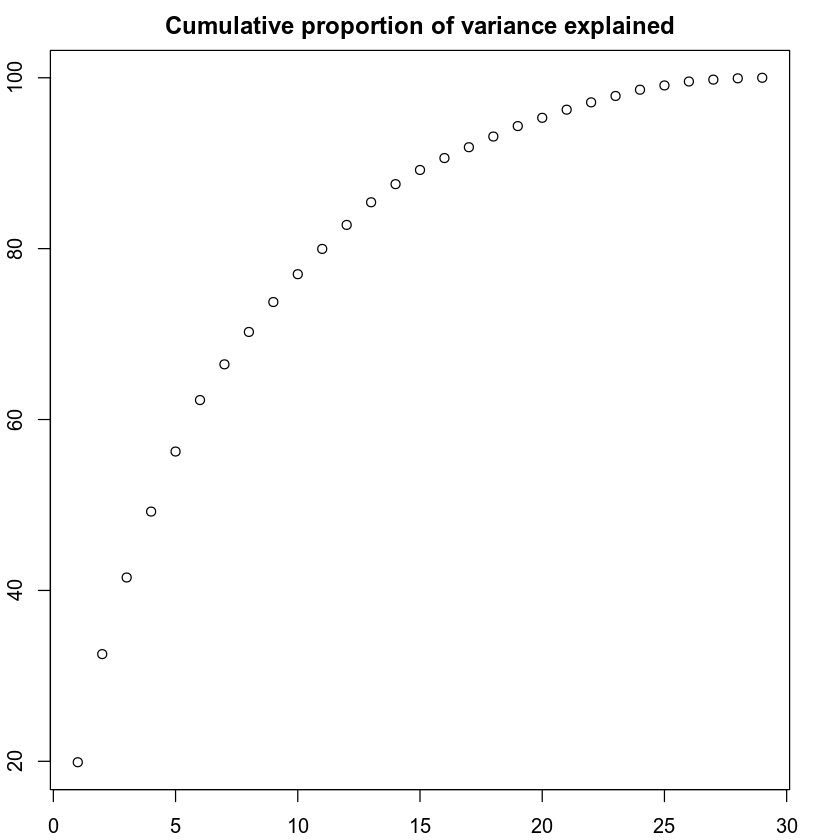

In [76]:
par(mfrow=c(1,1), mar=c(2.1,2.1,2.1,2.1))
plot(cumsum(pca$sdev)/sum(pca$sdev)*100,
     main="Cumulative proportion of variance explained")

¿Con cuántas PC nos quedamos? Pues por encima del 90%. Con 17.

In [64]:
min(which(cumsum(pca$sdev^2)/sum(pca$sdev^2)*100 > 90))

[1] 7

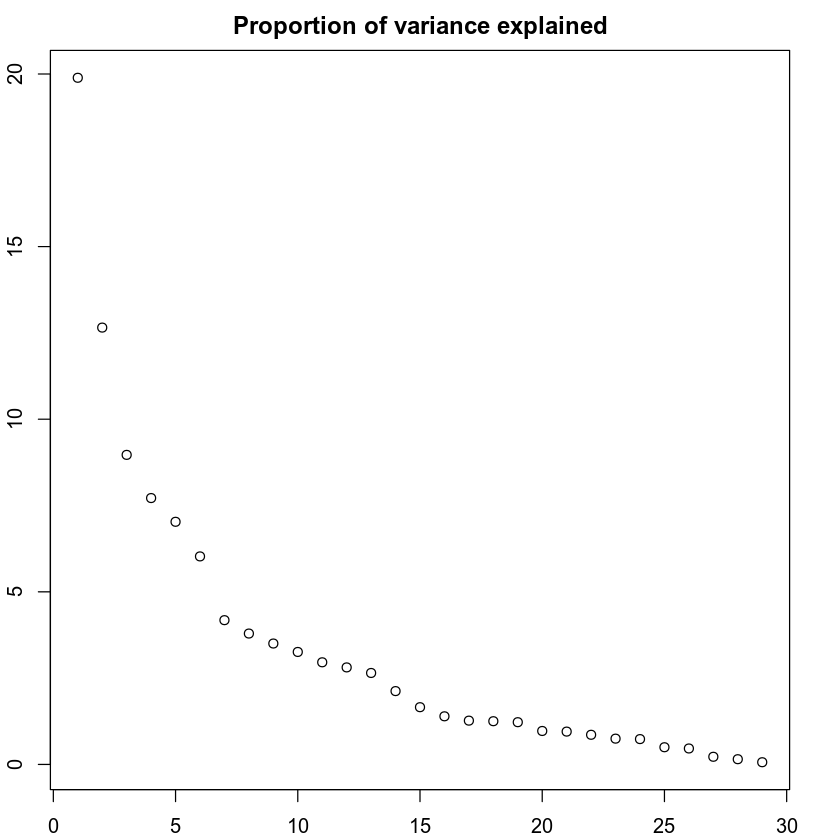

In [65]:
par(mfrow=c(1,1), mar=c(2.1,2.1,2.1,2.1))
plot(pca$sdev/sum(pca$sdev)*100,
     main="Proportion of variance explained")

In [31]:
?screeplot

Ploteamos las EOF.
Screeplot devuelve un gráfico de las varianzas (eje Y)
asociada con cada PC (eje X).
 Este gráfico es útil para decidir cuántas PCs.

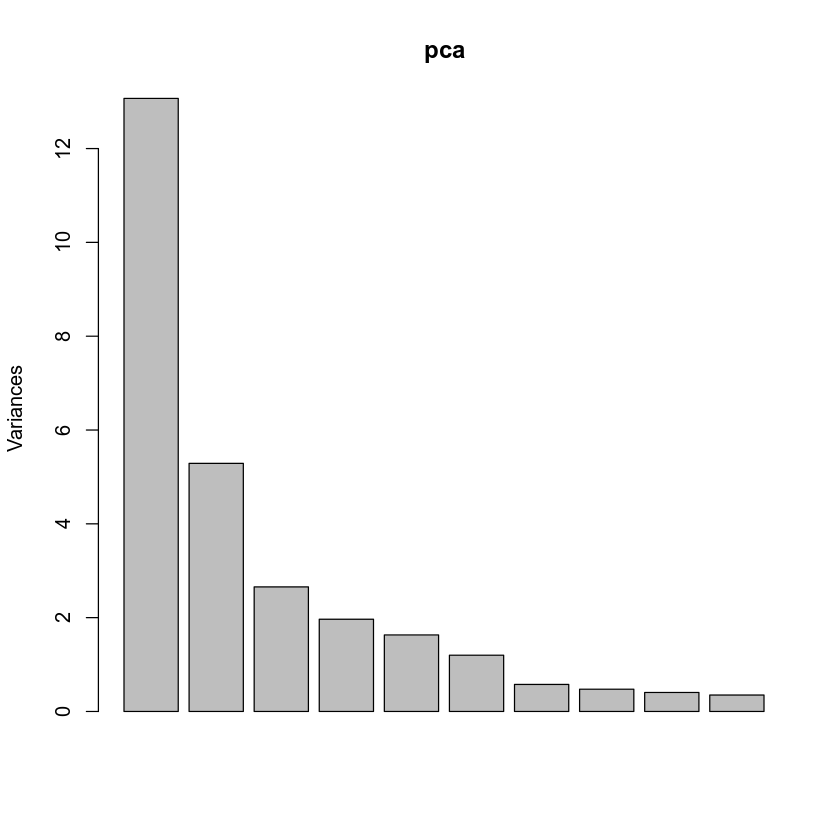

In [66]:
screeplot(pca)

Un biplot (? biplot ?biplot.princomp) permite visualizar tanto las observaciones como las covariables proyectados sobre las dos primeras PCs. Represéntalo para esta base de datos.

Un biplot (? biplot ?biplot.princomp) permite visualizar tanto las observaciones como las covariables proyectados sobre las dos primeras PCs. Represéntalo para esta base de datos.

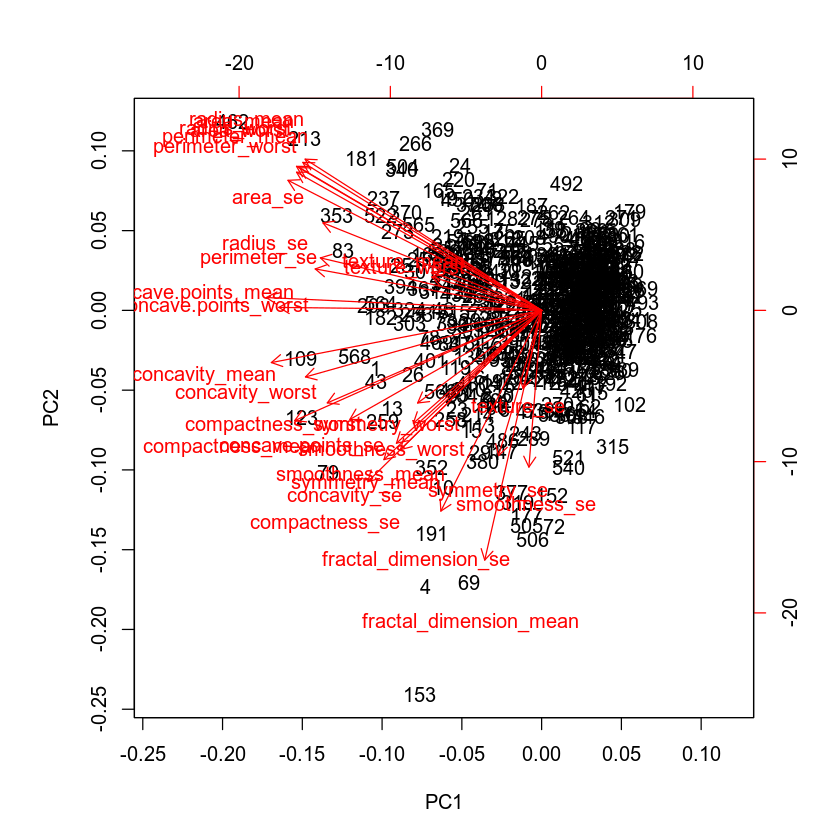

In [67]:
biplot(pca)

El biplot es útil cuando el número de covariables no es muy elevado. Representa gráficamente las primera EOFs de esta base de datos (p.ej. ? barplot), para poder interpretar mejor las combinaciones lineales de covariables a las que dan lugar. Comprueba también su ortogonalidad.

**Las direcciones están en el rotatios**
**LAS EOF son las P**
**LAS Z son las Z que tiene tantas filas como observaciones**

In [124]:
pca$rotation

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29
radius_mean,-0.22659046,0.227801069,-0.009389545,0.046947492,-3.262058e-02,0.0189943108,-0.182426579,0.041464394,-0.18240897,0.095832629,...,0.059113244,0.09094732,0.0980220274,0.136401398,0.119477243,-0.13043092,-0.128180460,-0.2042370335,-0.2171252189,-0.7025061540
texture_mean,-0.10567488,0.057232203,-0.100630683,-0.600028874,2.520306e-02,-0.0389823620,0.052618442,-0.148778807,0.06844006,0.245209003,...,0.313979941,-0.39514966,-0.0016230234,-0.157504093,0.009411986,-0.02495015,-0.019460018,-0.0002550843,0.0105964532,-0.0002832623
perimeter_mean,-0.23480448,0.208081720,-0.005748049,0.046623134,-3.310319e-02,0.0170140305,-0.164955826,0.050160842,-0.18949491,0.087521161,...,0.025888779,0.08785220,0.0393779187,0.056252685,0.105883123,-0.12629101,-0.114202594,-0.0779554754,-0.3843827750,0.6903957433
area_mean,-0.22879183,0.222871343,-0.047696649,0.061700126,5.769658e-05,0.0032420053,-0.111965065,-0.008692902,-0.16871514,0.075489492,...,0.111525936,0.05237198,-0.0084625790,0.051949432,-0.159721694,0.36824488,0.478101748,0.2636249471,0.4278649953,0.0326797309
smoothness_mean,-0.13910310,-0.200081786,0.161580013,0.126197372,3.579311e-01,-0.2918498059,-0.066864388,0.289105664,0.01491652,-0.067816714,...,-0.018603541,0.12918399,0.0197951906,-0.076029000,-0.023481495,-0.03663383,0.067010578,-0.0034191086,0.0042506082,0.0049722437
compactness_mean,-0.23662923,-0.166063473,0.107677668,0.017404295,-2.552773e-02,-0.0243117457,0.098396831,0.142622384,-0.22034654,0.023018999,...,-0.483165607,-0.26341359,-0.0535083456,-0.199607295,0.346507203,0.26139240,0.070588577,-0.0031394438,0.0445564756,-0.0441770703
concavity_mean,-0.25896307,-0.078606619,0.018239045,0.014635356,-9.617946e-02,-0.0217420038,-0.061180058,0.071697511,0.04052959,-0.135777108,...,-0.004665144,-0.04308118,-0.3217212312,0.078149524,-0.128439662,-0.54573398,0.367040575,-0.0508931242,0.0114636793,-0.0248778345
concave.points_mean,-0.26389916,0.019351248,0.041751651,0.057112609,3.959809e-02,-0.0587663895,-0.142083572,0.171186986,-0.08430870,0.008883881,...,0.170435952,-0.03297965,0.0574870755,0.183893894,-0.273552940,0.38359298,-0.458605537,0.0125262223,0.0029631535,0.0008865445
symmetry_mean,-0.13522201,-0.209764730,0.097539289,0.034814030,2.840631e-01,0.3529858796,-0.057316042,0.223879047,0.30483925,0.564464447,...,-0.038863399,0.07953153,0.0517395497,0.014923982,-0.039419802,-0.01621708,-0.015691389,-0.0018606259,0.0077139466,0.0012942827
fractal_dimension_mean,-0.05450948,-0.376115018,0.066848645,0.036401722,4.000424e-02,-0.1182682188,0.370717739,0.143331996,-0.20348431,0.090474122,...,0.222066503,0.15555750,0.0811565879,0.136528404,0.027019689,-0.09553855,-0.068100746,0.0191067458,-0.0130165568,0.0038248842


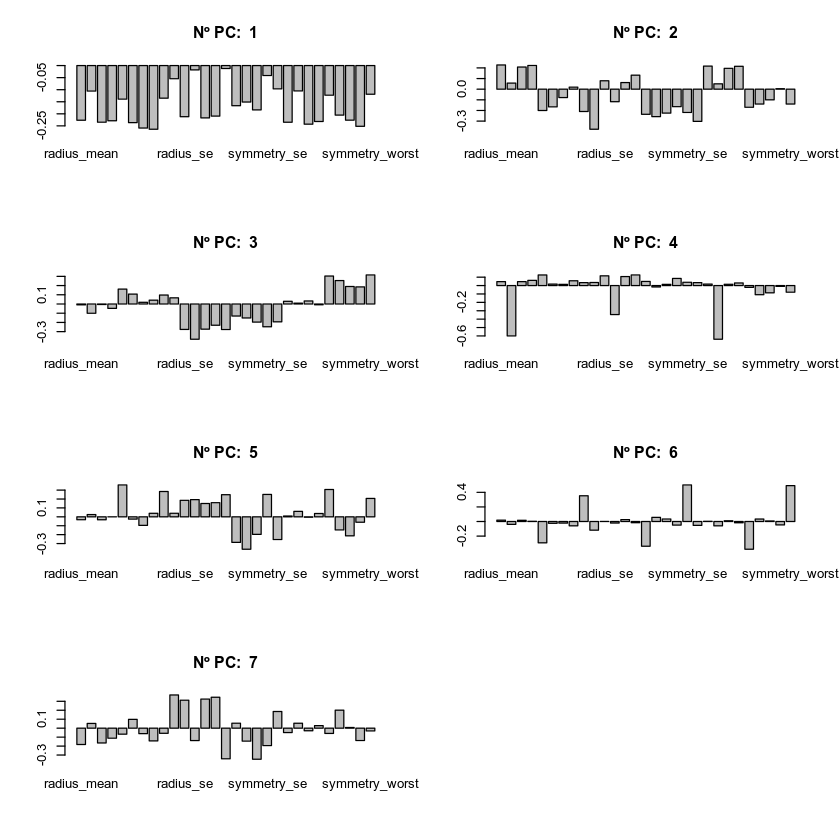

In [129]:
par(mfrow=c(4,2))
for (i in 1:7){
barplot(pca$rotation[,i], main = paste("Nº PC: ", i))
}

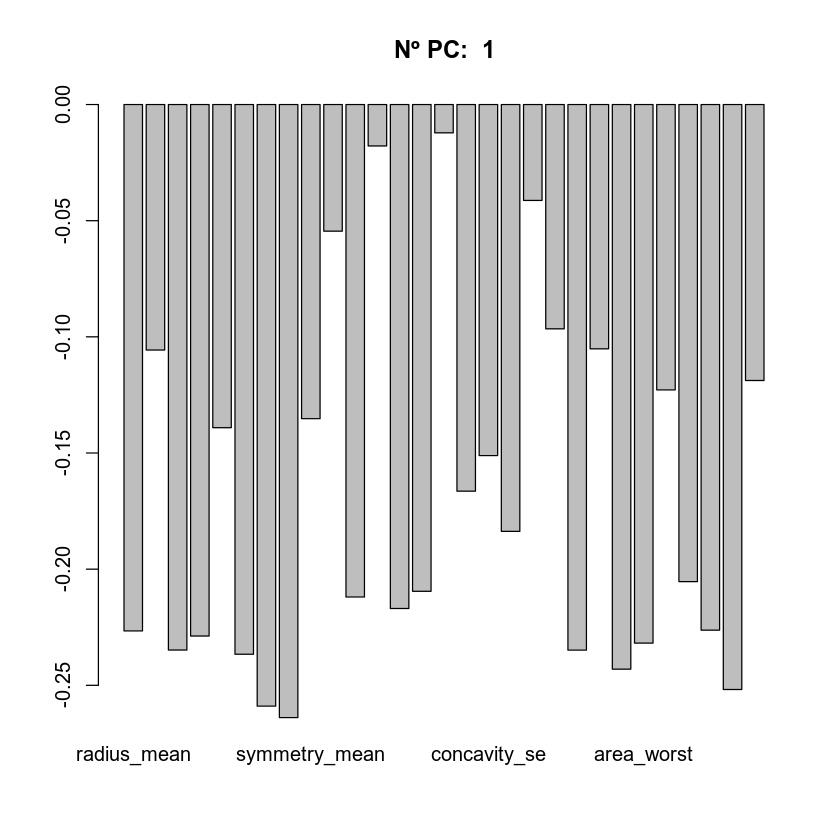

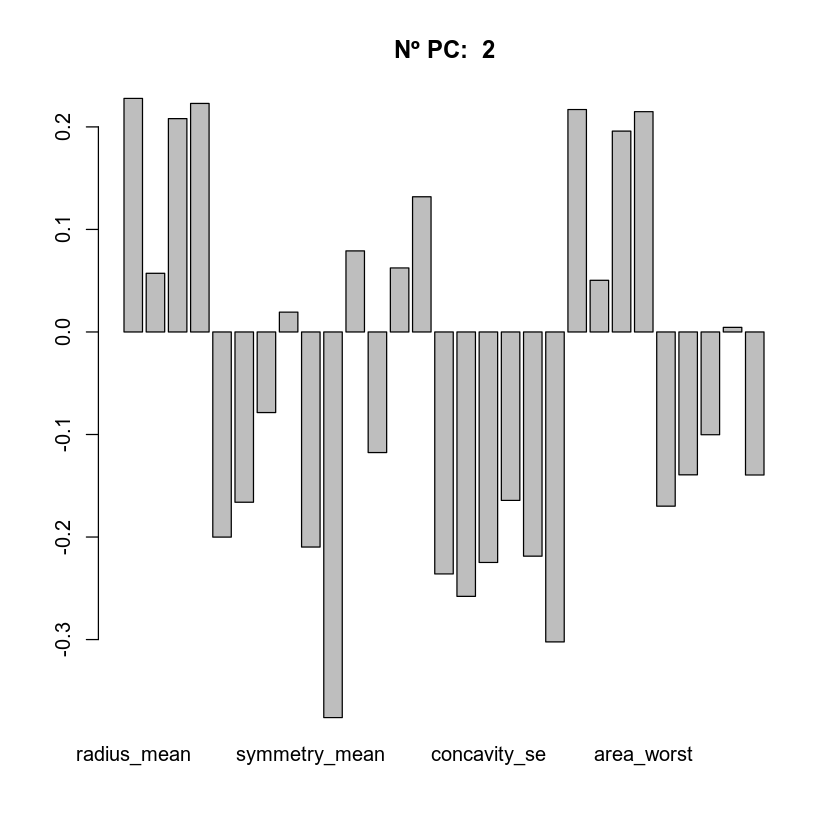

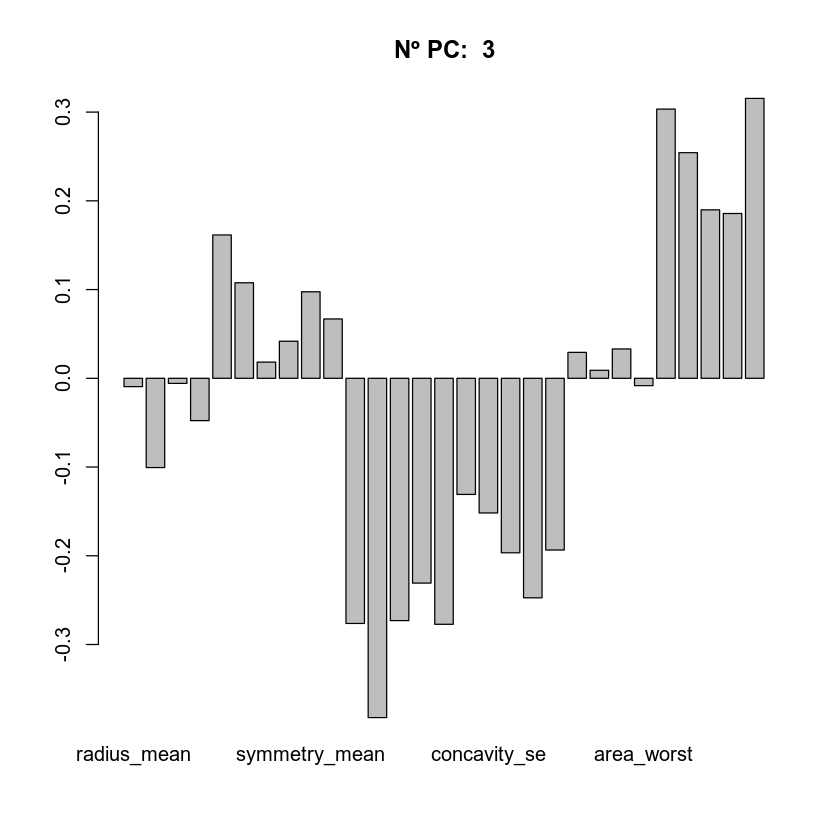

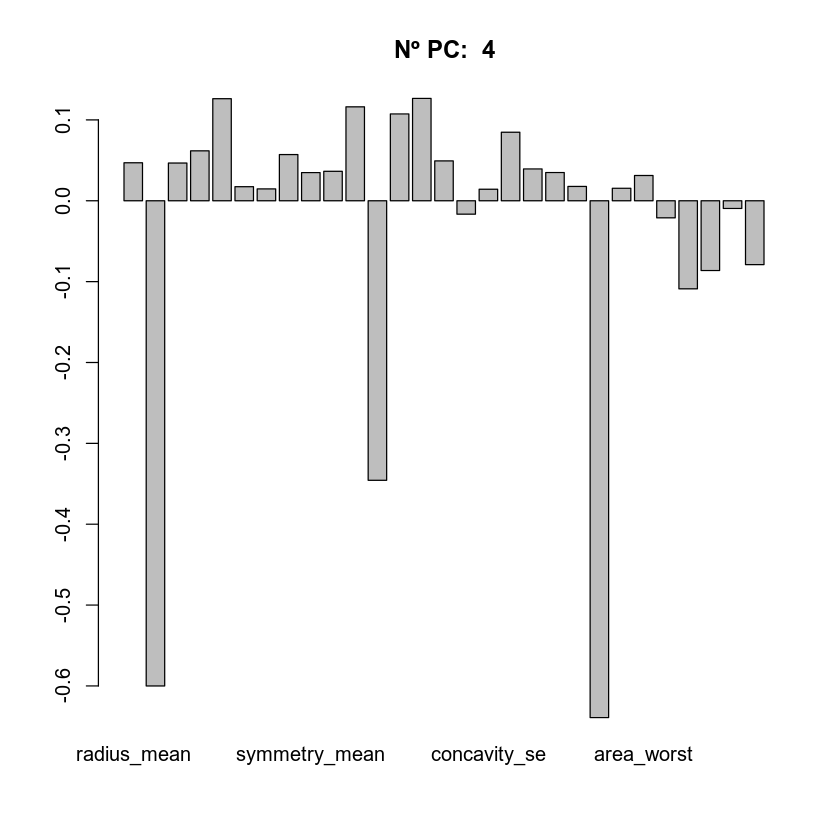

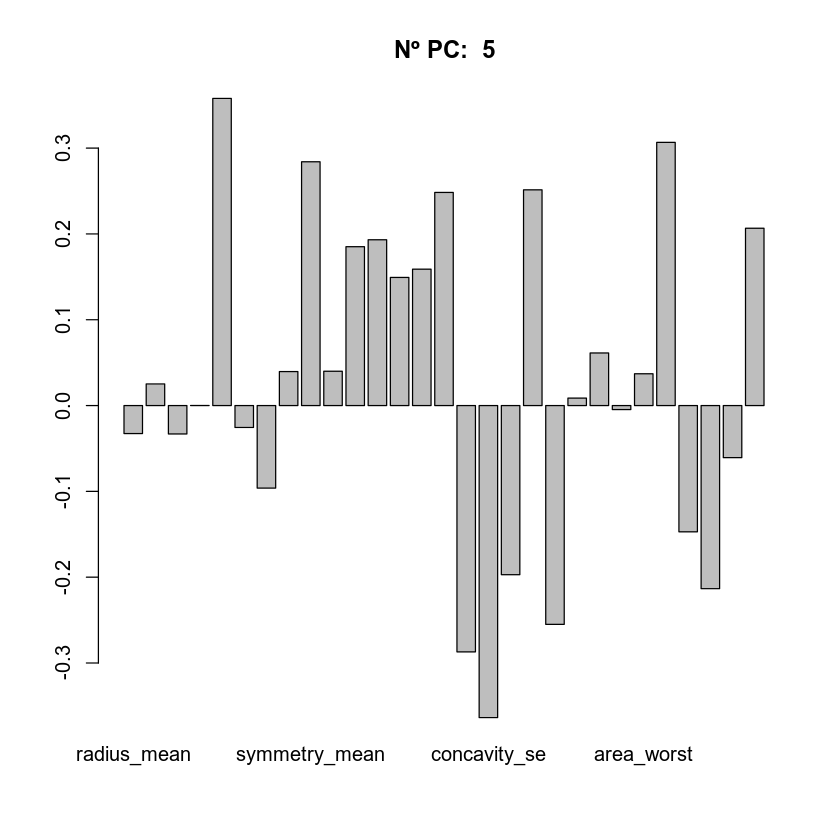

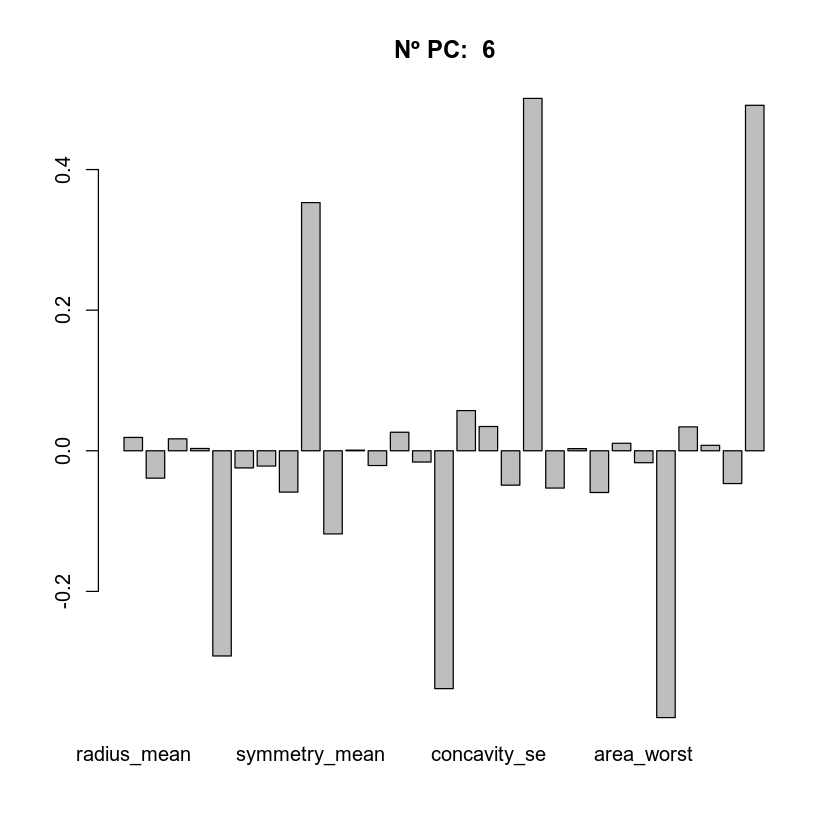

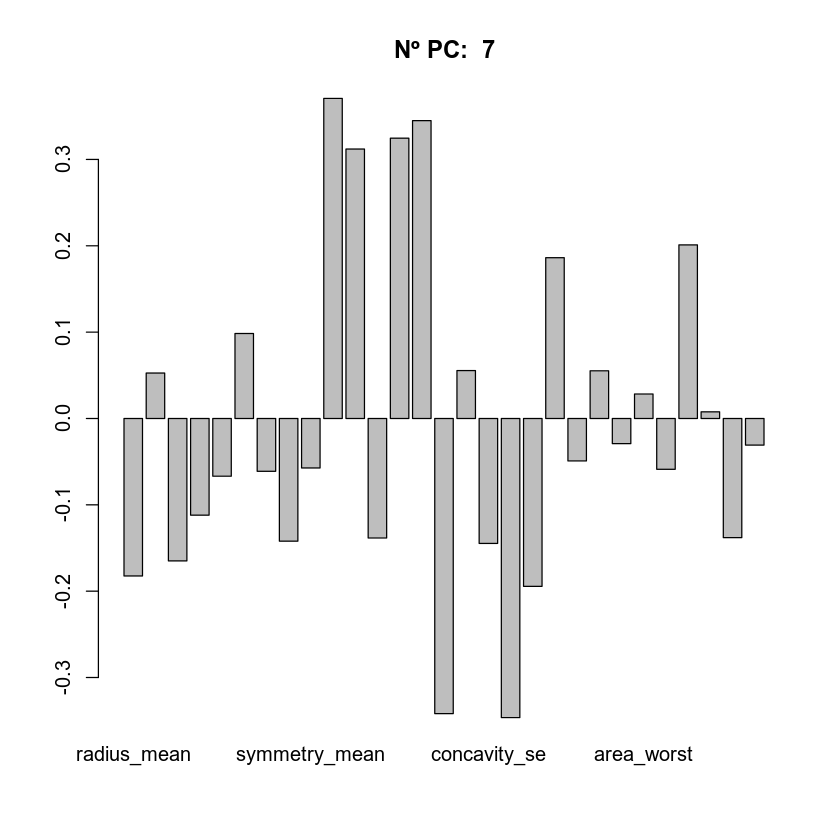

In [131]:
for (i in 1:7){
barplot(pca$rotation[,i], main = paste("Nº PC: ", i))
}

Para comprobar que son ortogonales: producto escalar

In [72]:
for (i in 1:6){
    for (j in (i+1):7){
        #print(paste(i,j))
        print(pca$x[,i] %*% pca$x[,j])
    }
}


             [,1]
[1,] -2.41851e-12
             [,1]
[1,] 8.348877e-14
             [,1]
[1,] 7.958079e-13
             [,1]
[1,] -2.09166e-13
              [,1]
[1,] -3.321787e-13
              [,1]
[1,] -7.158718e-13
             [,1]
[1,] 1.756373e-13
             [,1]
[1,] 7.451817e-13
              [,1]
[1,] -3.350931e-13
             [,1]
[1,] -2.88658e-14
              [,1]
[1,] -6.816769e-14
             [,1]
[1,] 6.630252e-13
             [,1]
[1,] -5.82312e-13
              [,1]
[1,] -1.798561e-13
             [,1]
[1,] 5.813128e-13
              [,1]
[1,] -5.259682e-13
             [,1]
[1,] 1.012523e-13
              [,1]
[1,] -1.709743e-13
             [,1]
[1,] 7.438494e-14
            [,1]
[1,] 1.64202e-13
             [,1]
[1,] 8.881784e-14


El producto escalar no se anula, pero es casi 0. ¿Quizá errores de la máquina?

Representa una de las muestras, junto con su reconstrucción mediante las r primeras PCs. Comprueba el efecto de aumentar el valor de r.

**Una fila es una muestra**

In [74]:
df[1,]

diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave.points_mean,symmetry_mean,...,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave.points_worst,symmetry_worst
1,1.0961,-2.071512,1.268817,0.9835095,1.567087,3.280628,2.650542,2.530249,2.215566,...,0.9062856,1.885031,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204


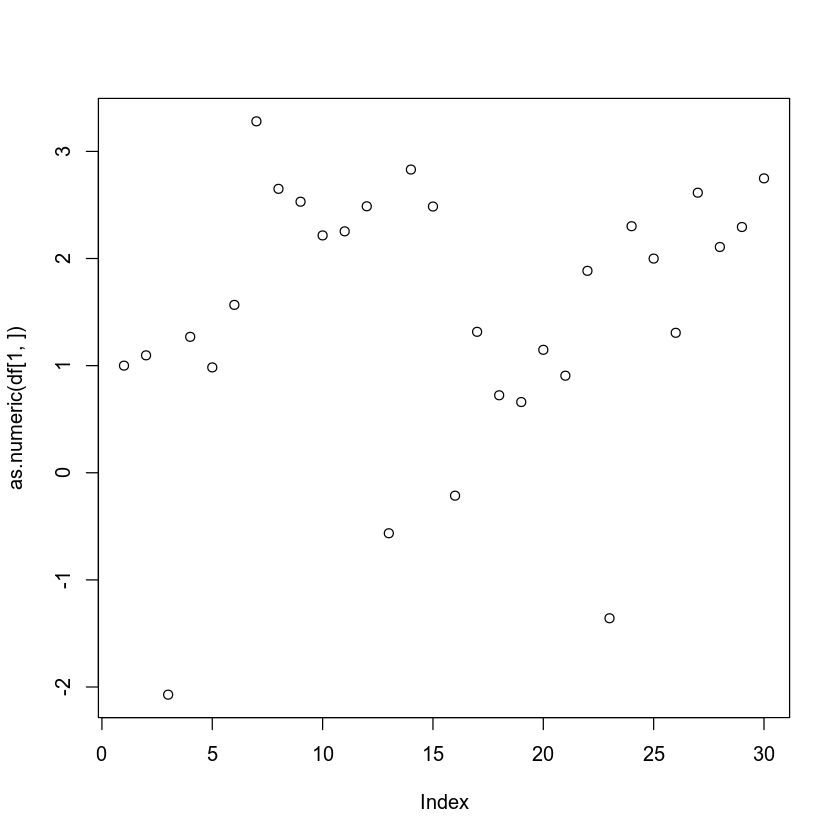

In [196]:
plot(as.numeric(df[1,]))

In [214]:
# ESTO FALLA
xrecovery = pca$x[,1:7] %*% t(pca$rotation[,1:7]) + pca$center

radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave.points_mean,symmetry_mean,fractal_dimension_mean,...,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave.points_worst,symmetry_worst
1.340653553,-1.33161473,1.48980177,1.52712371,2.20486646,2.80206235,2.26949981,2.257192325,2.69365113,2.0911392,...,1.26333567,1.694452393,-1.27391322,1.84292059,1.827708189,1.5115664,2.38940838,1.958030290,2.05744760,2.50332730
1.627484822,-0.33096486,1.56037785,1.56677608,-0.40554074,-0.08023924,0.43331524,0.866368954,-0.46405349,-1.5343685,...,-0.91815019,1.467247396,-0.41671561,1.39776442,1.399965257,-0.4934172,-0.20296641,0.171183369,0.75314128,-0.31964517
1.648138518,0.04468043,1.66954625,1.59552178,0.79358511,1.24043626,1.46773548,1.678422173,0.94719546,-0.2045148,...,0.02434613,1.605618119,0.07318154,1.62588561,1.517823369,0.6477341,1.03130357,1.254970533,1.63230478,1.01219447
-0.978628953,-0.11456035,-0.71802331,-0.96413178,3.36046931,3.40707029,2.05106421,1.415108878,5.03030292,4.2250499,...,2.03236976,-0.487726247,0.41111595,-0.21616095,-0.548395616,3.1406873,3.48693784,2.560903175,1.81102705,5.36127979
1.629950646,-1.20357191,1.60961326,1.65019250,0.74602786,0.54851984,1.08522944,1.448850768,-0.24402497,-0.6347051,...,0.20990896,1.359319913,-1.46404940,1.32049092,1.356250289,0.2131885,-0.25485515,0.319829156,1.00733380,-0.99392503
-0.450745318,-0.66177113,-0.34694547,-0.46420770,2.00497599,1.42080327,0.73792024,0.627887001,1.41300032,1.9007236,...,0.51204305,-0.185530393,-0.28096340,-0.09368874,-0.216518225,2.1952531,1.53514410,1.111302278,0.95108569,1.60998512
1.209398723,0.17937494,1.17307715,1.12139820,0.06108869,0.21408941,0.44225327,0.788536682,-0.16592925,-0.9339544,...,-0.92771576,1.200085652,0.31159061,1.15857352,1.107012562,0.3059988,0.37155706,0.518495725,0.92101622,0.26332465
-0.281097702,0.23752607,-0.20584418,-0.17265477,1.58604905,0.94299961,0.48491287,0.481941613,0.71155029,1.4333088,...,0.46787622,-0.007759095,0.42926970,0.04267252,0.090863708,1.6740453,0.82035520,0.483100681,0.46329112,0.49193649
-0.220613720,0.38745482,-0.11740306,-0.28974060,1.76243905,1.56230007,0.90698477,0.778019292,1.84451829,1.6563798,...,0.25107652,0.087456483,0.86238219,0.18673521,-0.006743236,2.1558509,1.92892775,1.465121903,1.23797058,2.41810176
-0.645149592,1.89977280,-0.43505836,-0.71520653,1.56785508,2.82574007,1.94294073,0.966285834,1.43869400,3.3431551,...,2.33308025,-0.131590237,2.41743307,0.11441778,-0.217661576,2.4472863,3.79165373,3.153677538,1.90247500,2.17883260


In [212]:
pca$center

radius_mean           texture_mean         perimeter_mean 
         -1.383450e-16           6.151104e-17          -1.193179e-16 
             area_mean        smoothness_mean       compactness_mean 
          1.219428e-16           1.620945e-16          -7.617540e-17 
        concavity_mean    concave.points_mean          symmetry_mean 
          3.883768e-17          -5.281303e-17           1.686096e-16 
fractal_dimension_mean              radius_se             texture_se 
          4.814025e-16           3.704199e-17          -1.065620e-16 
          perimeter_se                area_se          smoothness_se 
          1.075224e-16           2.887141e-17           1.291348e-16 
        compactness_se           concavity_se      concave.points_se 
         -1.651341e-17          -5.963912e-17           7.596656e-18 
           symmetry_se   fractal_dimension_se           radius_worst 
          9.091369e-17           1.641737e-18          -8.481243e-17 
         texture_worst        perimeter_worst             area_worst 
          8.874833e-18           5.618339e-17           6.829140e-18 
      smoothness_worst      compactness_worst        concavity_worst 
         -2.263799e-16           1.194795e-17           9.130316e-17 
  concave.points_worst         symmetry_worst 
          1.135802e-17           2.752601e-16

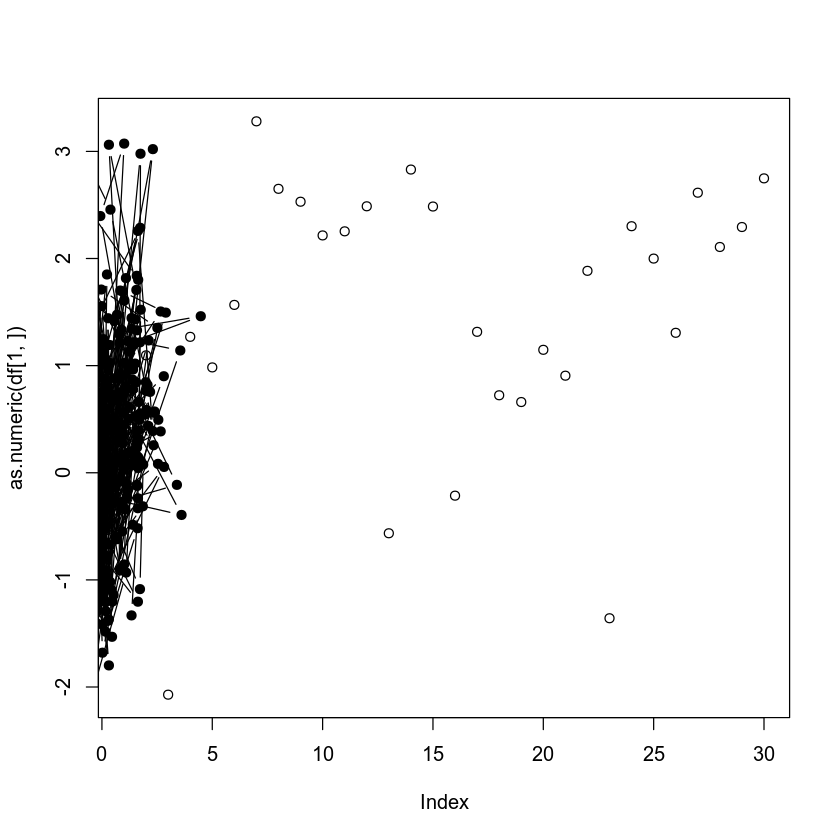

In [216]:
plot(as.numeric(df[1,]))
points(xrecovery, type = "b", pch = 19)

### Análisis de discriminante lineal

Realiza un Análisis Discriminante Lineal sobre esta base de datos. En este caso, se trata de una técnica de aprendizaje supervisado, en la que involucramos la variable respuesta en la elección de direcciones de proyección de los datos. Representa gráficamente la primera (y única, en este caso) dirección discriminante (p.ej. ? barplot).

In [90]:
library ( MASS )
# Model Discriminant Analysis
model.lda <- lda(diagnosis ~ ., data = df)

In [108]:
#model.lda

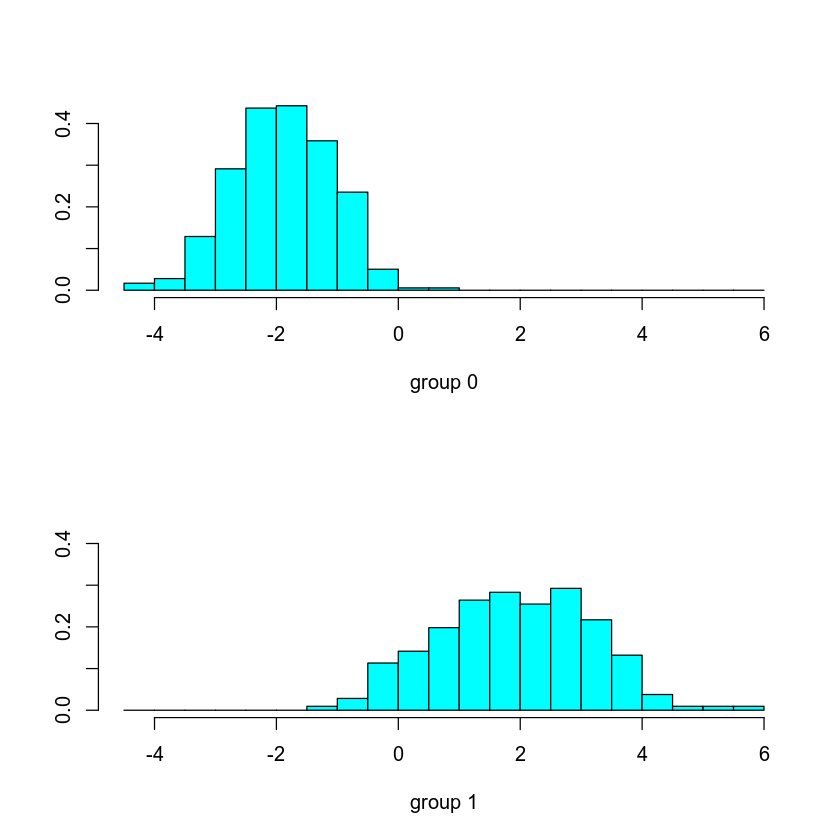

In [92]:
plot(model.lda)

Utiliza LDA para predecir usando el conjunto de datos completo. Examina los valores de la salida de la función (`? predict`, `? predict.lda`) y representa la distribución de los datos a lo largo de la dirección dada por el primer LD (p.ej `? plot` o `? ldahist`).

In [98]:
lda.pred <- predict(model.lda, df)

In [164]:
lda.pred$posterior

0,1
2.531101e-05,9.999747e-01
3.924088e-03,9.960759e-01
5.545173e-06,9.999945e-01
3.272017e-06,9.999967e-01
2.323834e-03,9.976762e-01
2.345899e-02,9.765410e-01
1.906288e-03,9.980937e-01
1.332423e-01,8.667577e-01
1.215297e-02,9.878470e-01
2.578083e-05,9.999742e-01


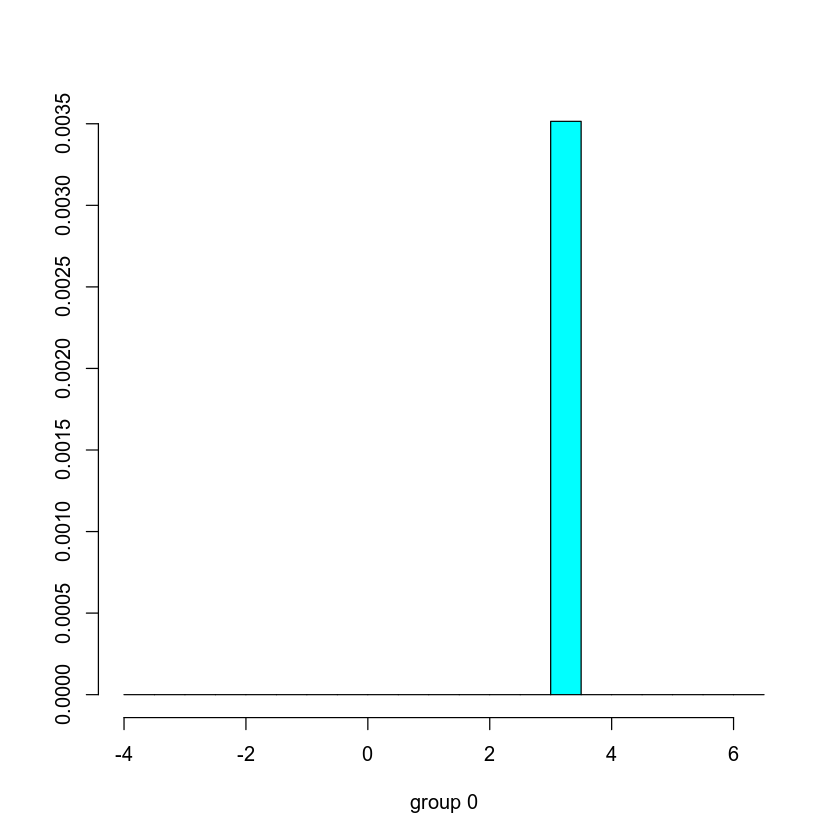

In [160]:
ldahist(data = lda.pred$x[,1], g = 0)

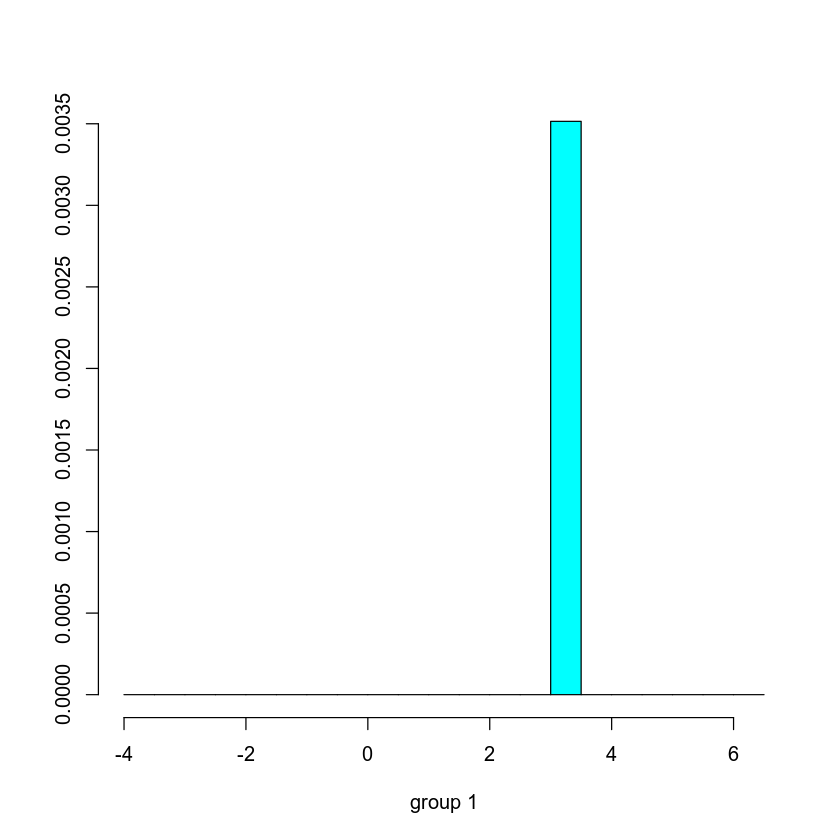

In [161]:
ldahist(data = lda.pred$x[,1], g = 1)

Obtén una tabla de contingencia para estudiar la pericia de este método lineal de clasificación.

In [175]:
lda.table <- confusionMatrix(as.factor(df$diagnosis), lda.pred$class)
lda.table
# Vamos el accuracy 0.96

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 356   1
         1  18 194
                                          
               Accuracy : 0.9666          
                 95% CI : (0.9483, 0.9798)
    No Information Rate : 0.6573          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9274          
                                          
 Mcnemar's Test P-Value : 0.0002419       
                                          
            Sensitivity : 0.9519          
            Specificity : 0.9949          
         Pos Pred Value : 0.9972          
         Neg Pred Value : 0.9151          
             Prevalence : 0.6573          
         Detection Rate : 0.6257          
   Detection Prevalence : 0.6274          
      Balanced Accuracy : 0.9734          
                                          
       'Positive' Class : 0               
                              

El LDA proporciona una predicción probabilista de las clases, ya que esta técnica implementa un clasificador bayesiano, basado en las probabilidades a posteriori de pertenencia a cada clase, bajo la hipótesis de normalidad. Utilizar una técnica de validación probabilista, como las curva ROC para evaluar la pericia de esta predicción probabilista.

In [172]:
library(verification, quietly = TRUE) # roc.area


Spam version 2.8-0 (2022-01-05) is loaded.
Type 'help( Spam)' or 'demo( spam)' for a short introduction 
and overview of this package.
Help for individual functions is also obtained by adding the
suffix '.spam' to the function name, e.g. 'help( chol.spam)'.


Attaching package: ‘spam’


The following objects are masked from ‘package:base’:

    backsolve, forwardsolve



Try help(fields) to get started.


Attaching package: ‘boot’


The following object is masked from ‘package:lattice’:

    melanoma



Attaching package: ‘proxy’


The following object is masked from ‘package:spam’:

    as.matrix


The following objects are masked from ‘package:stats’:

    as.dist, dist


The following object is masked from ‘package:base’:

    as.matrix


Loaded dtw v1.22-3. See ?dtw for help, citation("dtw") for use in publication.




In [186]:
auc <- roc.area(as.numeric(as.character(df$diagnosis)), 
                as.numeric(as.character(lda.pred$class)))
auc

$A
[1] 0.9561466

$n.total
[1] 569

$n.events
[1] 212

$n.noevents
[1] 357

$p.value
[1] 5.350341e-109

ERROR: Error in text.default(DAT[id, 3, i], DAT[id, 2, i], plot.thres[id2], pos = 4, : zero-length 'labels' specified


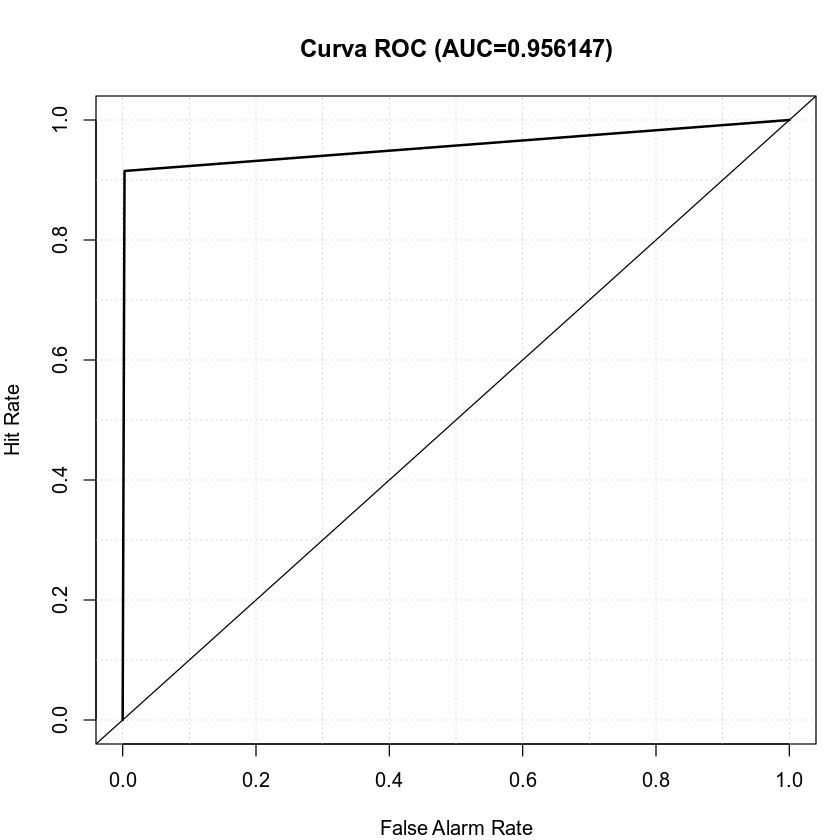

In [195]:
roc.plot(as.numeric(df$diagnosis), 
         as.numeric(lda.pred$class), 
         main = sprintf("Curva ROC (AUC=%g)", auc$A))